# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lospalos
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | abepura
Processing Record 4 of Set 1 | gamay
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | novyy urgal
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | mossel bay
Processing Record 9 of Set 1 | holualoa
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | wanganui
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | labrador city
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Rec

Processing Record 38 of Set 4 | badger
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | leava
Processing Record 41 of Set 4 | muncar
Processing Record 42 of Set 4 | medina
Processing Record 43 of Set 4 | nuuk
Processing Record 44 of Set 4 | la sarre
Processing Record 45 of Set 4 | reitz
Processing Record 46 of Set 4 | la palma
Processing Record 47 of Set 4 | kavalerovo
Processing Record 48 of Set 4 | linhares
Processing Record 49 of Set 4 | hinton
Processing Record 0 of Set 5 | egilsstadir
Processing Record 1 of Set 5 | bambari
Processing Record 2 of Set 5 | mukalla
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | chernyshevskiy
Processing Record 5 of Set 5 | lushun
Processing Record 6 of Set 5 | kalecik
Processing Record 7 of Set 5 | kailua-kona
Processing Record 8 of Set 5 | yermentau
Processing Record 9 of Set 5 | fisterra
Processing Record 10 of Set 5 | qaqortoq
Processing Record 11 of Set 5 | lompoc
Processing Record 12 of Set 5 | punt

Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | howrah
Processing Record 36 of Set 8 | taroa
Processing Record 37 of Set 8 | manadhoo
Processing Record 38 of Set 8 | brookings
Processing Record 39 of Set 8 | walvis bay
Processing Record 40 of Set 8 | santa rosalia
Processing Record 41 of Set 8 | al khafji
Processing Record 42 of Set 8 | santa marta
Processing Record 43 of Set 8 | sorong
Processing Record 44 of Set 8 | gunnison
Processing Record 45 of Set 8 | miyanoura
City not found. Skipping...
Processing Record 46 of Set 8 | yuzhno-kurilsk
Processing Record 47 of Set 8 | mabaruma
Processing Record 48 of Set 8 | lewisburg
Processing Record 49 of Set 8 | verkhniy mamon
Processing Record 0 of Set 9 | mhangura
Processing Record 1 of Set 9 | bogale
Processing Record 2 of Set 9 | rio gallegos
Processing Record 3 of Set 9 | topki
Processing Record 4 of Set 9 | marvdasht
City not found. Skipping...
Processing Record 5 of Set 9 | road town
Processing Record 6 of Set 9 | 

Processing Record 19 of Set 12 | sinop
Processing Record 20 of Set 12 | dakhla
Processing Record 21 of Set 12 | cartagena
Processing Record 22 of Set 12 | ialibu
Processing Record 23 of Set 12 | aroma
Processing Record 24 of Set 12 | delaware
Processing Record 25 of Set 12 | kidal
Processing Record 26 of Set 12 | grootfontein
Processing Record 27 of Set 12 | buala
Processing Record 28 of Set 12 | tazacorte
Processing Record 29 of Set 12 | palembang
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | toga village
City not found. Skipping...
Processing Record 32 of Set 12 | periyapatti
Processing Record 33 of Set 12 | isle of lewis
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lospalos,-8.5186,127.0025,20.70,79,41,3.40,TL,1694959906
1,hithadhoo,-0.6000,73.0833,28.16,78,47,7.19,MV,1694959907
2,abepura,-2.6333,140.5833,25.45,83,40,1.03,ID,1694959907
3,gamay,12.3854,125.2979,26.59,85,41,1.28,PH,1694959907
4,novyy urgal,51.0736,132.5642,12.19,74,100,1.10,RU,1694959907


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lospalos,-8.5186,127.0025,20.70,79,41,3.40,TL,1694959906
1,hithadhoo,-0.6000,73.0833,28.16,78,47,7.19,MV,1694959907
2,abepura,-2.6333,140.5833,25.45,83,40,1.03,ID,1694959907
3,gamay,12.3854,125.2979,26.59,85,41,1.28,PH,1694959907
4,novyy urgal,51.0736,132.5642,12.19,74,100,1.10,RU,1694959907


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [24]:
# Created a function to reproduce the scatter plots
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="red", marker="X", edgecolor="black", linewidths=0.5)
    plt.tight_layout()
    plt.grid()

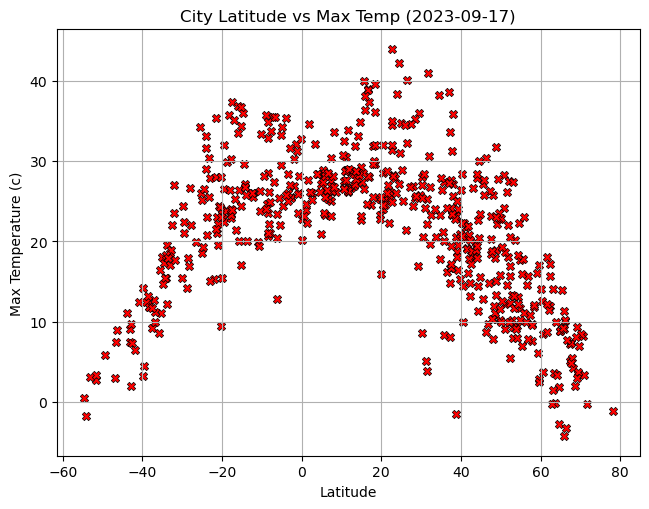

In [25]:
# https://stackoverflow.com/a/75222939/21871037
# title=(f"Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})"))

# Build scatter plot for latitude vs. temperature
build_scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

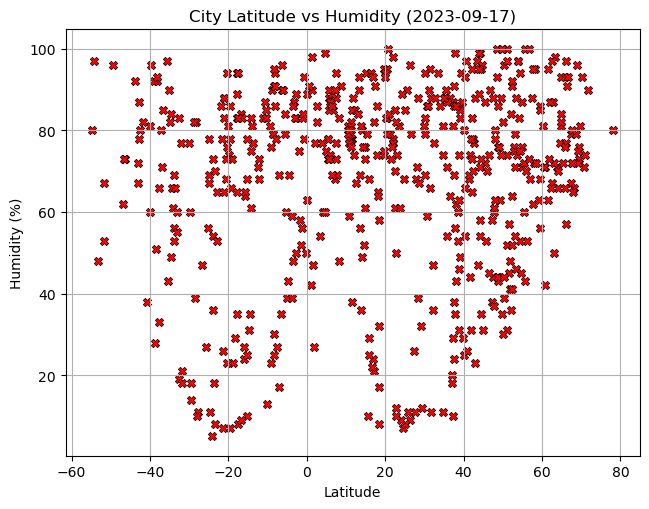

In [26]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

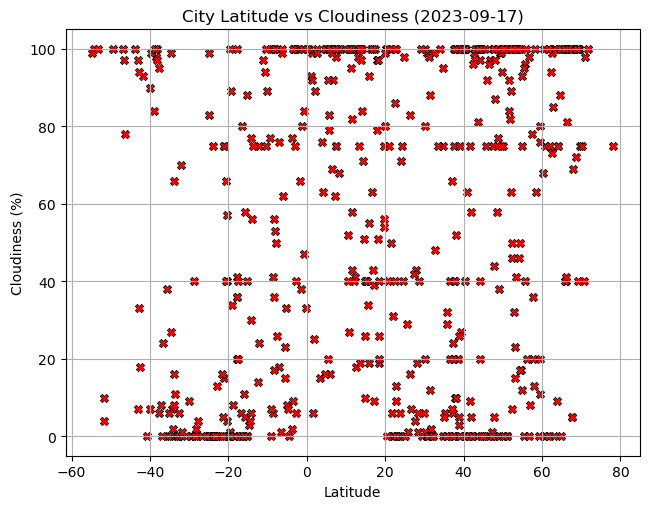

In [27]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

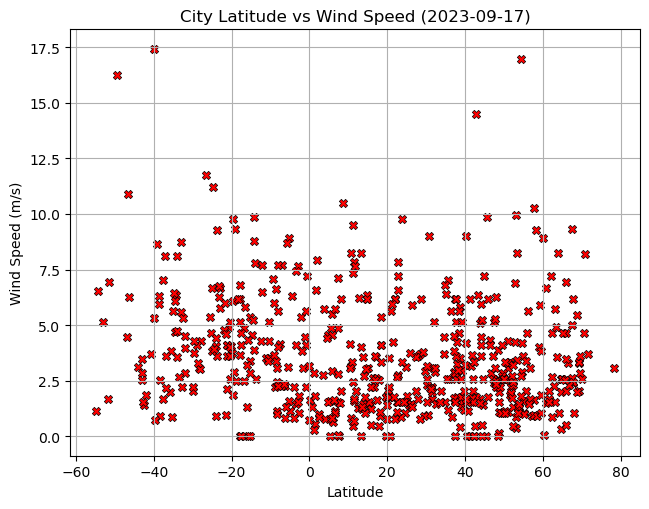

In [28]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches="tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,gamay,12.3854,125.2979,26.59,85,41,1.28,PH,1694959907
4,novyy urgal,51.0736,132.5642,12.19,74,100,1.10,RU,1694959907
7,holualoa,19.6228,-155.9522,23.21,74,56,1.79,US,1694959908
10,bilibino,68.0546,166.4372,4.20,66,100,1.06,RU,1694959646
12,iqaluit,63.7506,-68.5145,-0.17,71,9,3.58,CA,1694959908


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lospalos,-8.5186,127.0025,20.70,79,41,3.40,TL,1694959906
1,hithadhoo,-0.6000,73.0833,28.16,78,47,7.19,MV,1694959907
2,abepura,-2.6333,140.5833,25.45,83,40,1.03,ID,1694959907
5,port-aux-francais,-49.3500,70.2167,5.85,96,100,16.24,TF,1694959907
6,mossel bay,-34.1831,22.1460,15.44,61,2,6.37,ZA,1694959818


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7407080405717735


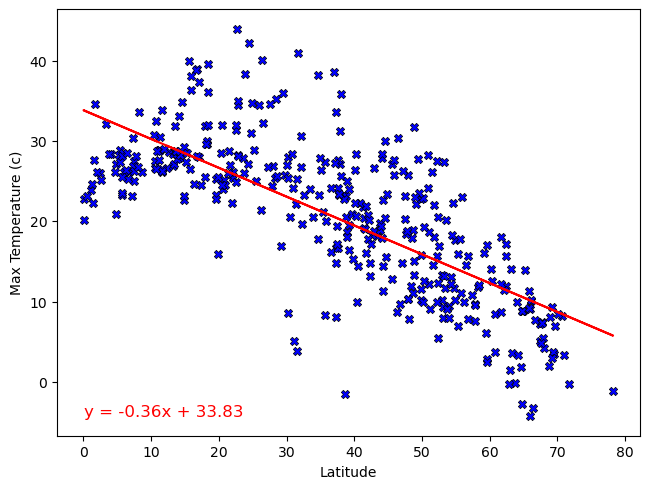

In [32]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7706903367069948


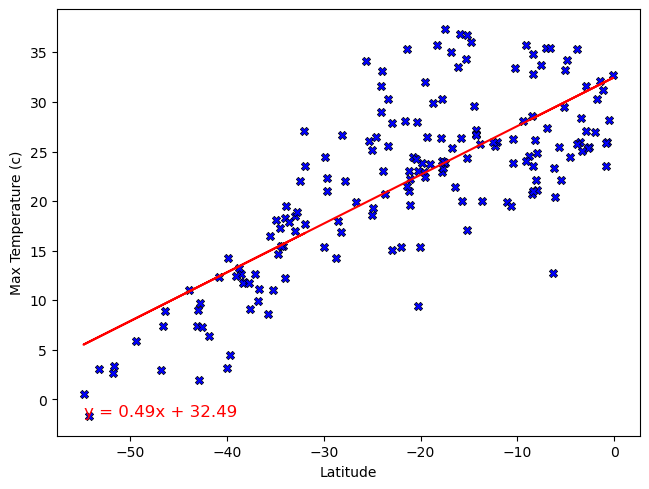

In [33]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:**  

    - With an 'r-value' of -0.7 and 0.7, there's a strong correlation between the distance from the equator and the Max Temperature
        - The northern hemisphere has a strong negative correlation
        - The southern hemisphere has a strong positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04868993266413008


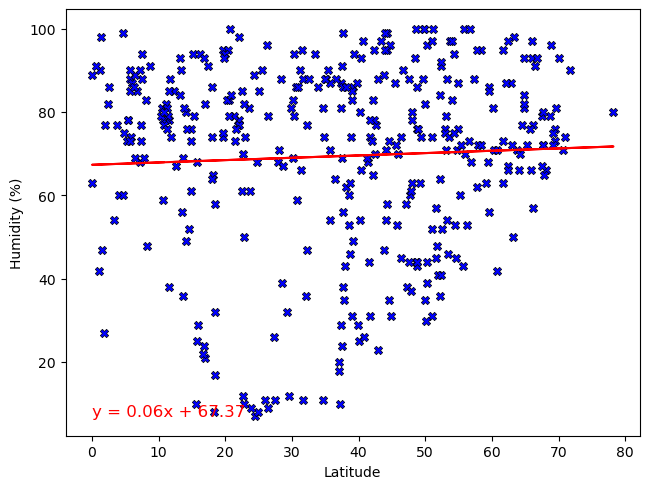

In [34]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: -0.005068151231955702


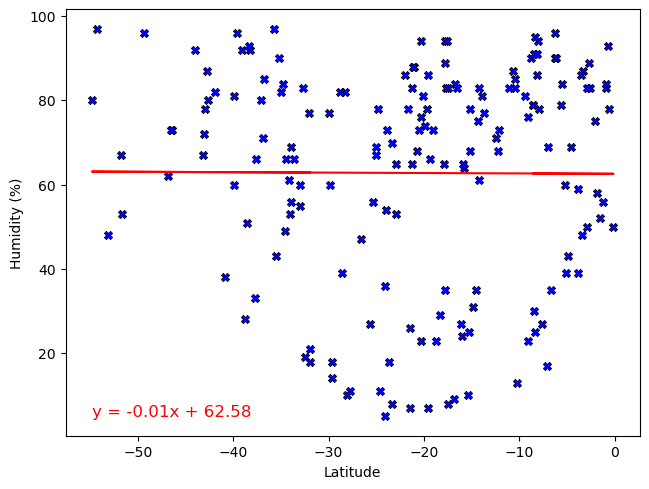

In [35]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:**  

    - Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.
    - It would be interesting to look at the city correlation of -10 to 10 latitude degrees from the equator and the Humidity to see if a stronger correlation exists without the outliers of further latitudes affecting the result.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0011043826613651433


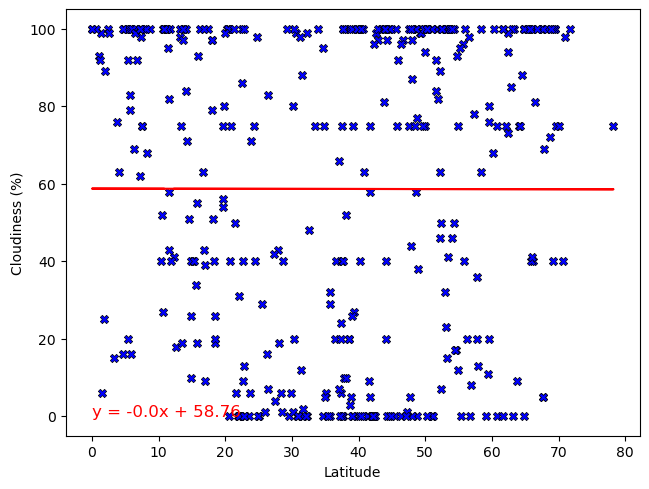

In [36]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.025322188128050836


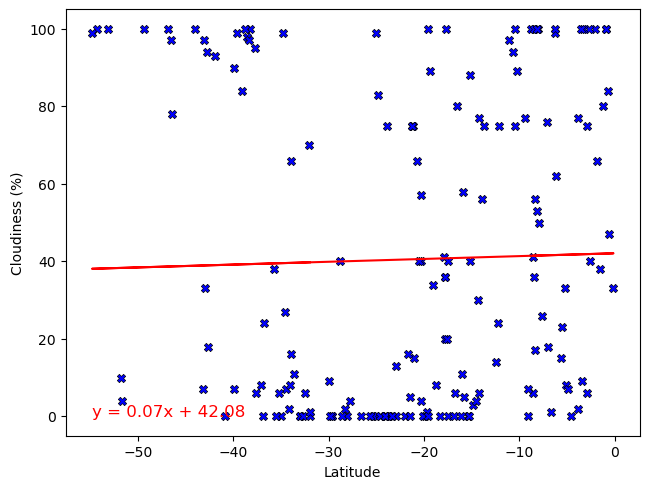

In [37]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**  

    - Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.
    - The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than that of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04956591020863512


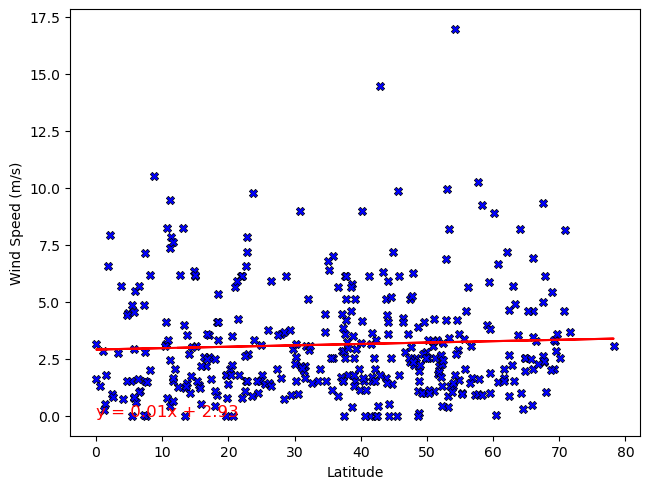

In [38]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.14352670740794773


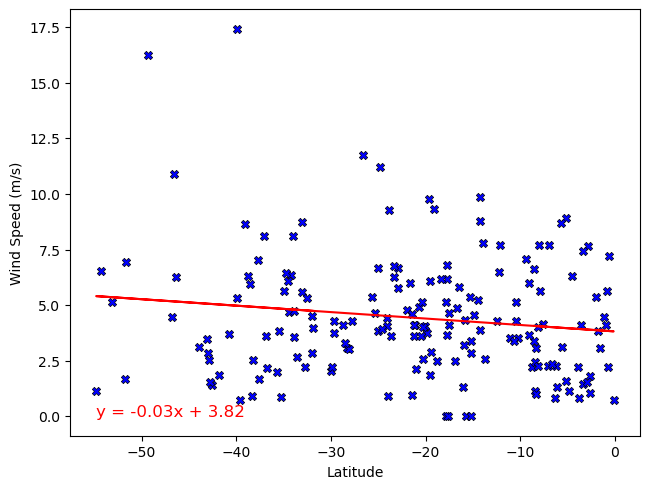

In [39]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:**  

    - Again there's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.